In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("../../Datasets/Retail/retail_train_data.csv")

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_prep = data.copy()

In [ ]:
data.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,982644.000000,982644.000000,982644,982644.000000,982644.000000,982644.000000,982644.000000,982644,982644.000000
unique,NaN,NaN,911,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-06-30,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,886058,NaN
mean,558.444843,3.998282,NaN,5760.843202,632.770227,0.828585,0.380183,NaN,0.171928
std,321.909907,2.000138,NaN,3857.573443,465.401378,0.376871,0.485432,NaN,0.377318
min,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,280.000000,2.000000,NaN,3705.000000,403.000000,1.000000,0.000000,NaN,0.000000
50%,558.000000,4.000000,NaN,5731.000000,609.000000,1.000000,0.000000,NaN,0.000000
75%,838.000000,6.000000,NaN,7847.000000,838.000000,1.000000,1.000000,NaN,0.000000


In [ ]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  object
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 67.5+ MB


In [ ]:
data_prep.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [ ]:
data_prep.sort_values(by=["Store","Date"],ascending=[True,True],inplace=True)

In [ ]:
data_prep.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
981530,1,2,2013-01-01,0,0,0,0,a,1
980415,1,3,2013-01-02,5530,668,1,0,0,1
979300,1,4,2013-01-03,4327,578,1,0,0,1
978185,1,5,2013-01-04,4486,619,1,0,0,1
977070,1,6,2013-01-05,4997,635,1,0,0,1


In [ ]:
data_prep.reset_index(drop=True,inplace=True)

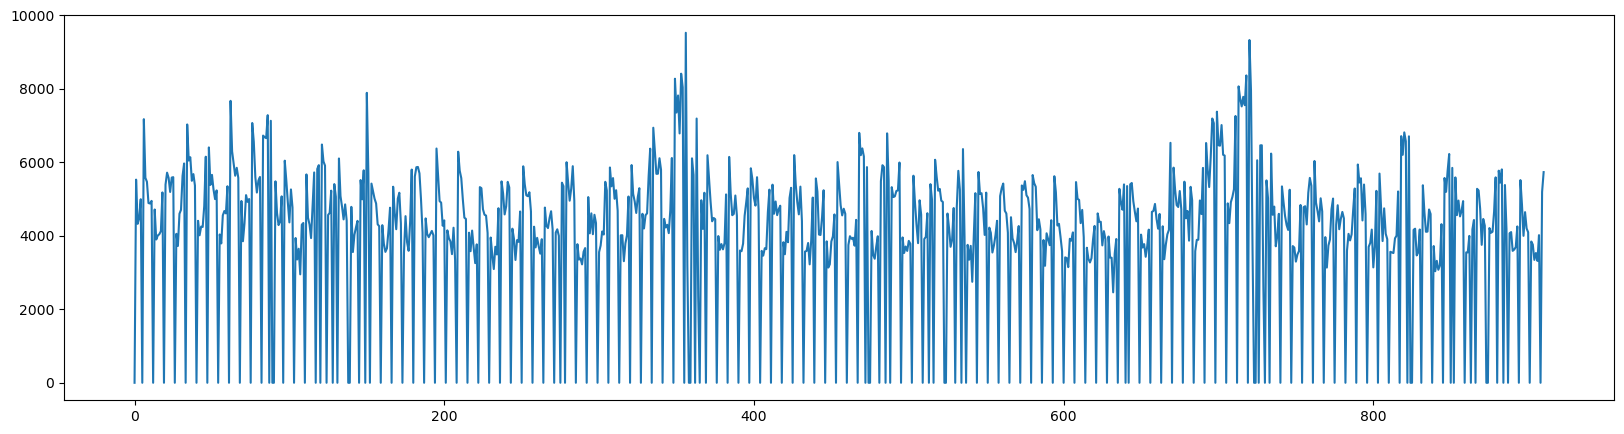

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data_prep[['Sales']].loc[data_prep["Store"]==1])

## Data preprocessing for time series analysis

### Omiting '0' values with rolling mean of window 7

In [ ]:
df = pd.DataFrame({'val':[]})
for i in data_prep['Store'].unique():
    df = df.append(pd.DataFrame({'val':data_prep['Sales'].loc[data_prep['Store']==i].rolling(window=7).mean()}))
df

,val
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
982639,4872.000000
982640,4708.000000
982641,4708.000000
982642,5552.285714


In [ ]:
data_prep['Sales_norm'] = data_prep['Sales']

In [ ]:
for i in data_prep[data_prep['Sales']==0].index:
    data_prep['Sales_norm'].iloc[i] = df.iloc[i]

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data_prep.drop(data_prep[(data_prep['Sales_norm']== np.NINF)].index,axis=0,inplace=True)

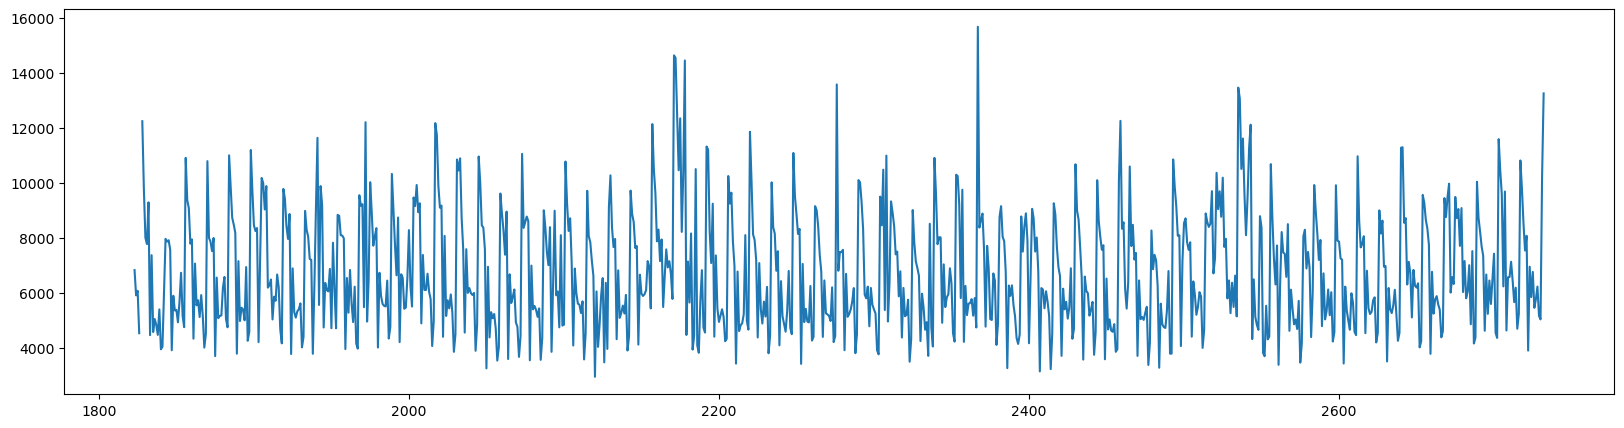

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data_prep[['Sales_norm']].loc[data_prep["Store"]==3])

In [ ]:
df = pd.DataFrame({'val':[]})
for i in data_prep['Store'].unique():
    df = df.append(pd.DataFrame({'val':np.log(data_prep['Sales_norm'].loc[data_prep['Store']==i])}))

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
data_prep['Sales_norm'] = df['val']

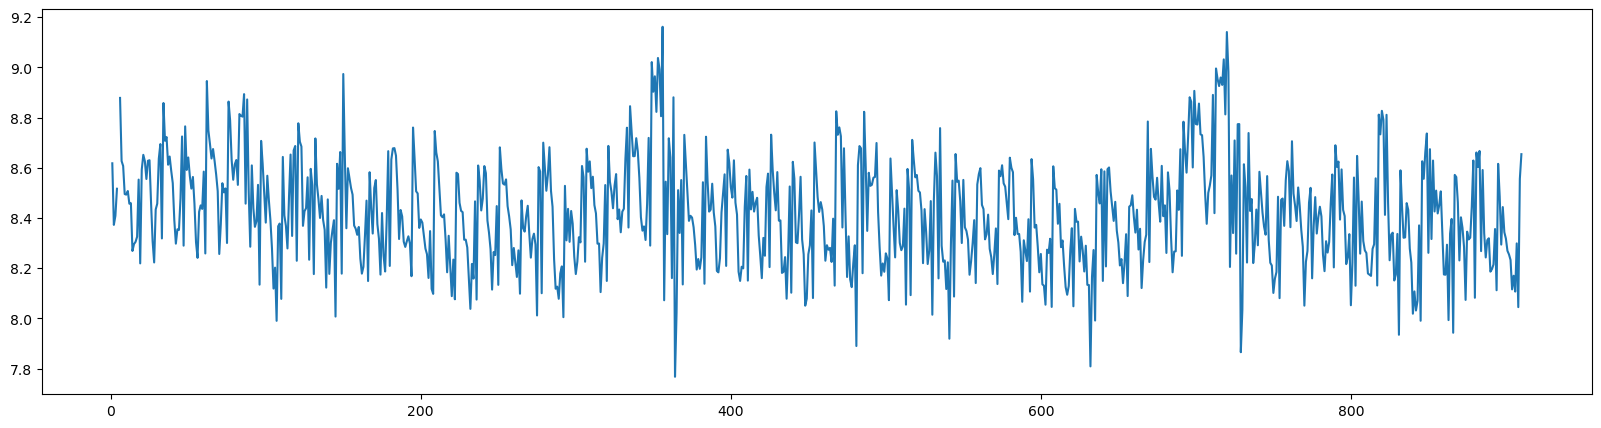

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data_prep[['Sales_norm']].loc[data_prep["Store"]==1])

In [ ]:
data_prep.head()
features = data_prep[['Store','Sales_norm']]

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationary(timeseries):

    # determine rolling stats.
    movingAvg=timeseries.rolling(window=7).mean()
    movingStd=timeseries.rolling(window=7).std()

    # plot rolling stats.
    plt.figure(figsize=(20,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(movingAvg,color='red',label='Rolling Avg')
    plt.plot(movingStd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Time series Stats')
    plt.show()


    # Perform Dickey fuller test
    print('results: ')
    dickey_Fuller_Test = adfuller(timeseries)
    dftestOutput = pd.Series(dickey_Fuller_Test[0:4],index=['Test Stat','p-value','#Lags Used','Number of Observations used'])
    for key,value in dickey_Fuller_Test[4].items():
        dftestOutput['critical values(%s)' %key] = value
    print(dftestOutput)

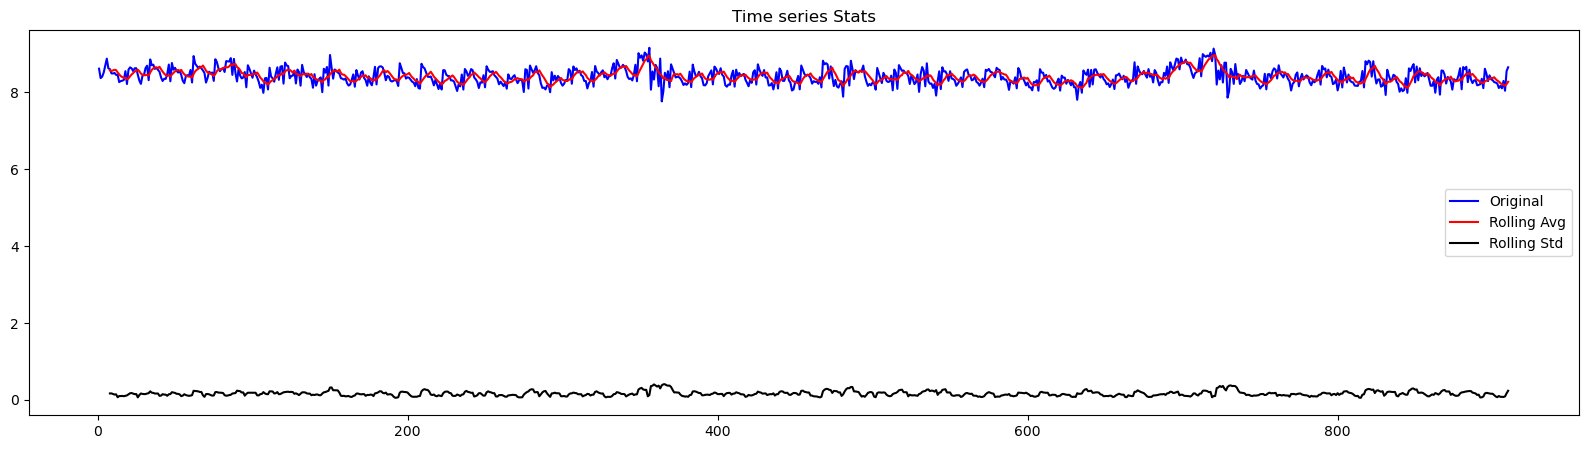

results: 
Test Stat                       -4.526238
p-value                          0.000176
#Lags Used                      21.000000
Number of Observations used    887.000000
critical values(1%)             -3.437744
critical values(5%)             -2.864804
critical values(10%)            -2.568508
dtype: float64


In [ ]:
test_stationary(data_prep['Sales_norm'].loc[data_prep['Store']==1].dropna())

In [ ]:
data_timeseries = data_prep[['Date','Sales_norm','Store']]

In [ ]:
df = pd.DataFrame({'val':[]})
for i in data_prep['Store'].unique():
    df = df.append(pd.DataFrame({'val': data_timeseries['Sales_norm'].loc[data_timeseries['Store']==i] - data_timeseries['Sales_norm'].loc[data_timeseries['Store']==i].shift() }))

In [ ]:
data_timeseries['Sales_station'] = df['val']

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


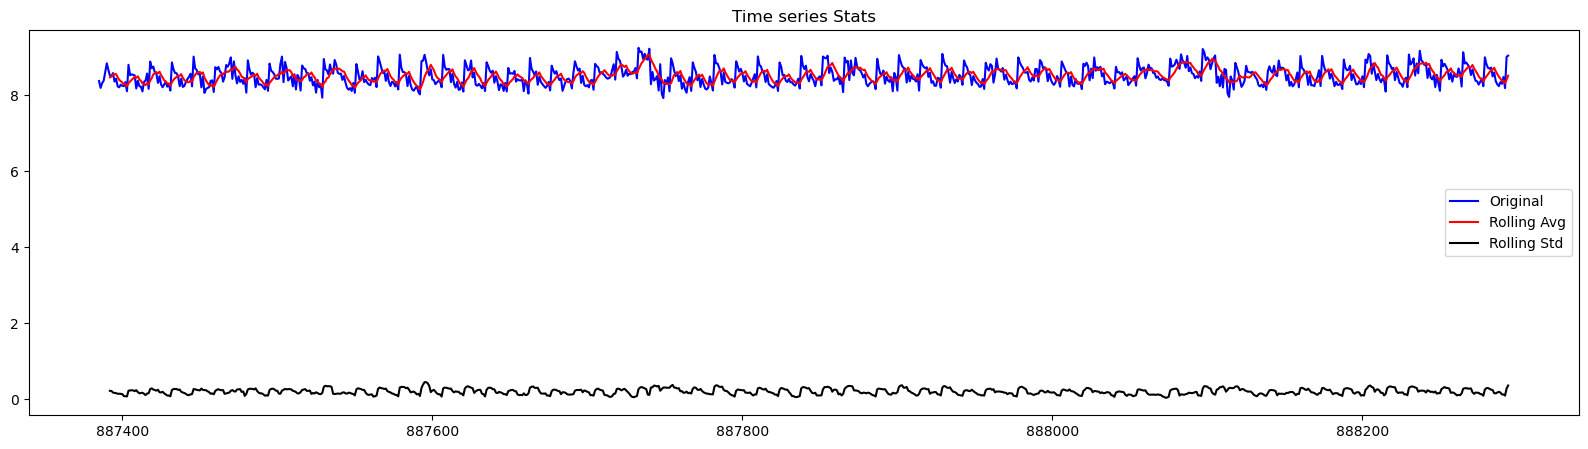

results: 
Test Stat                       -4.939479
p-value                          0.000029
#Lags Used                      21.000000
Number of Observations used    887.000000
critical values(1%)             -3.437744
critical values(5%)             -2.864804
critical values(10%)            -2.568508
dtype: float64


In [ ]:
test_stationary(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1008].dropna())

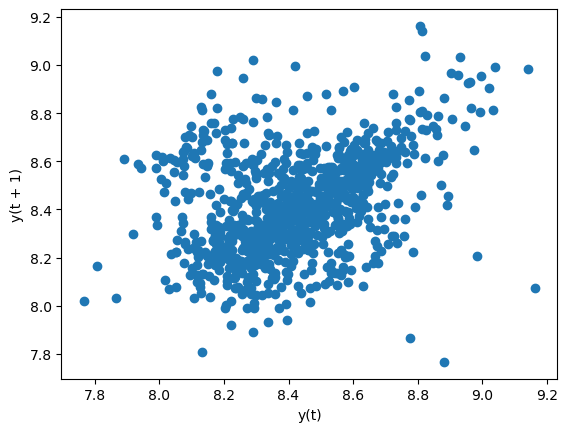

In [ ]:
pd.plotting.lag_plot(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna())
plt.show()

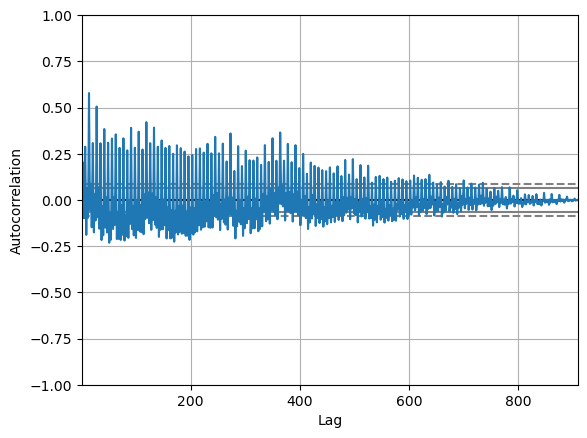

In [ ]:
pd.plotting.autocorrelation_plot(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==7].dropna())
plt.show()

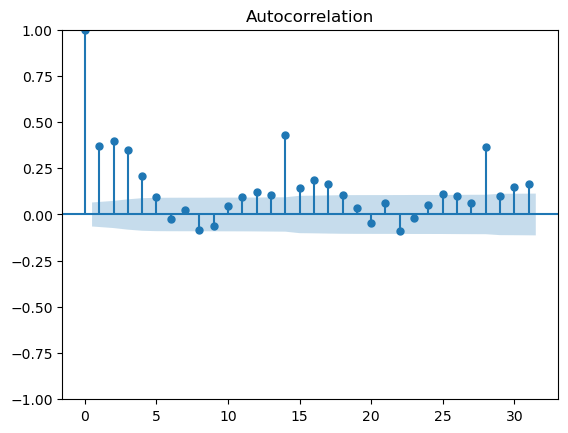

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna(),lags=31)
plt.show()

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


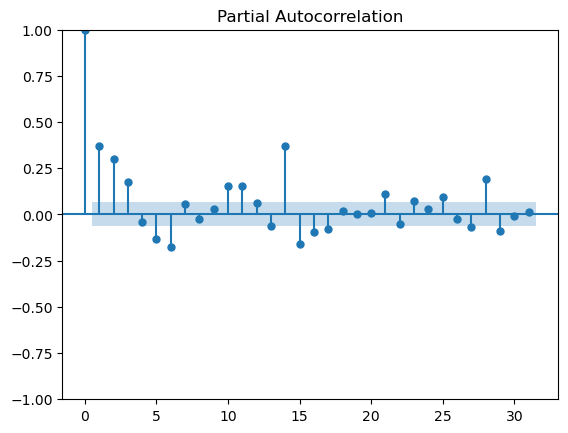

<Figure size 2000x500 with 0 Axes>

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna(),lags=31)
plt.figure(figsize=(20,5))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
lag_acf = acf(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna(),nlags=31)
lag_pacf = pacf(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna(),nlags=31)

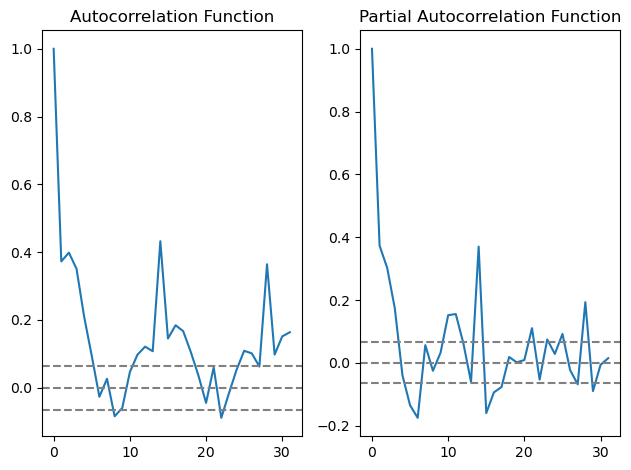

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna())), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna())), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()



c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


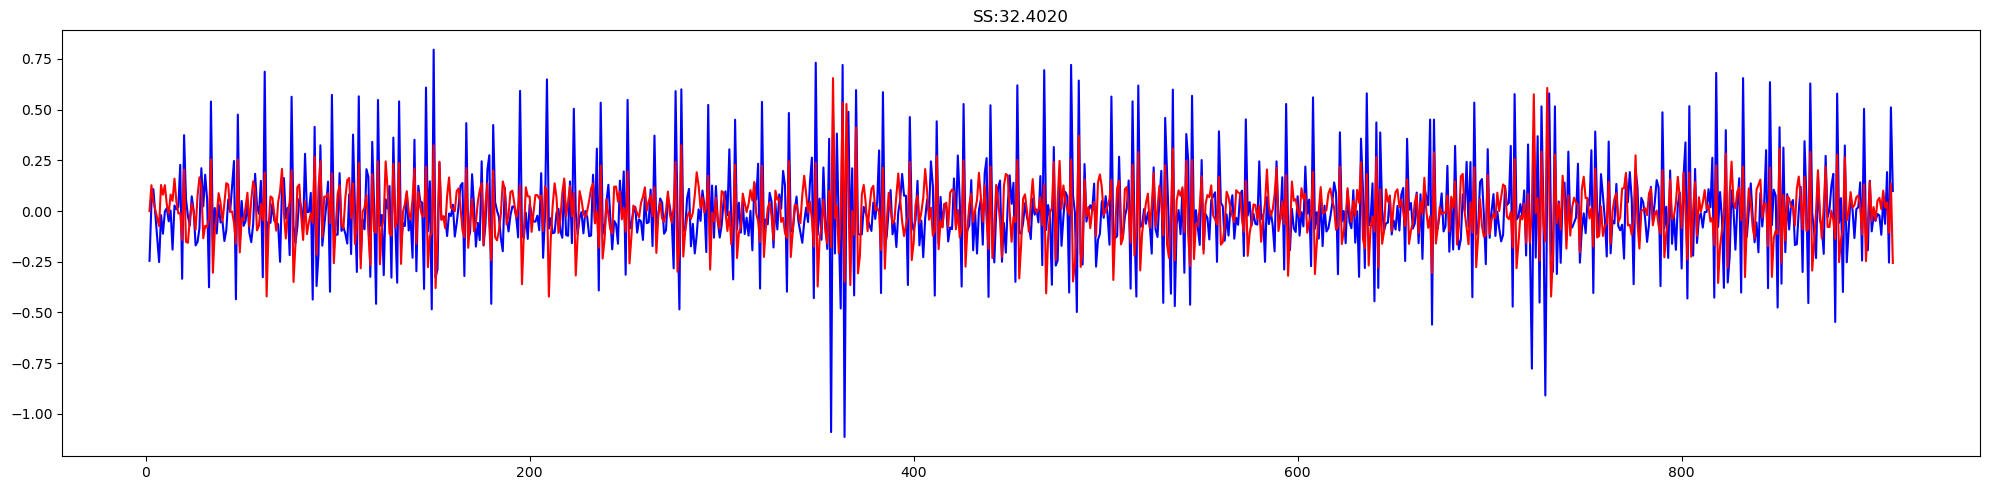

In [ ]:
# Auto Regressieve model
model_AR =ARIMA(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna(),order=(7,0,0))
results_ARIMA = model_AR.fit()

plt.figure(figsize=(20,5))
plt.plot(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna(),color='blue')
plt.plot(results_ARIMA.fittedvalues,color='red')
#plt.plot(np.power(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna() - results_ARIMA.fittedvalues,2),color='black')
plt.title('SS:%.4f'%sum((results_ARIMA.fittedvalues-data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna())**2))
plt.tight_layout()

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


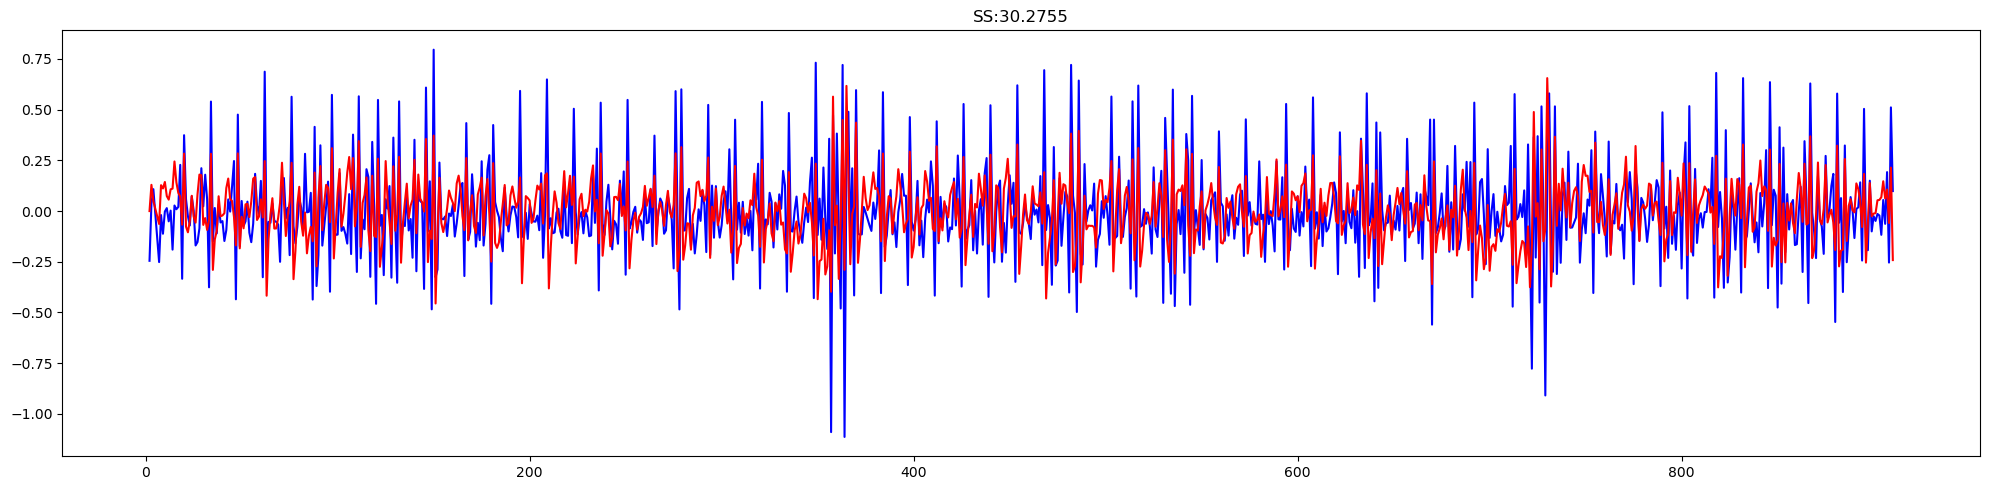

In [ ]:
# Moving Average model
model_AR =ARIMA(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna(),order=(0,0,5))
results_ARIMA = model_AR.fit()

plt.figure(figsize=(20,5))
plt.plot(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna(),color='blue')
plt.plot(results_ARIMA.fittedvalues,color='red')
#plt.plot(np.power(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna() - results_ARIMA.fittedvalues,2),color='black')
plt.title('SS:%.4f'%sum((results_ARIMA.fittedvalues-data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna())**2))
plt.tight_layout()

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\monda\anaconda3\envs\Deeplearning_CPU

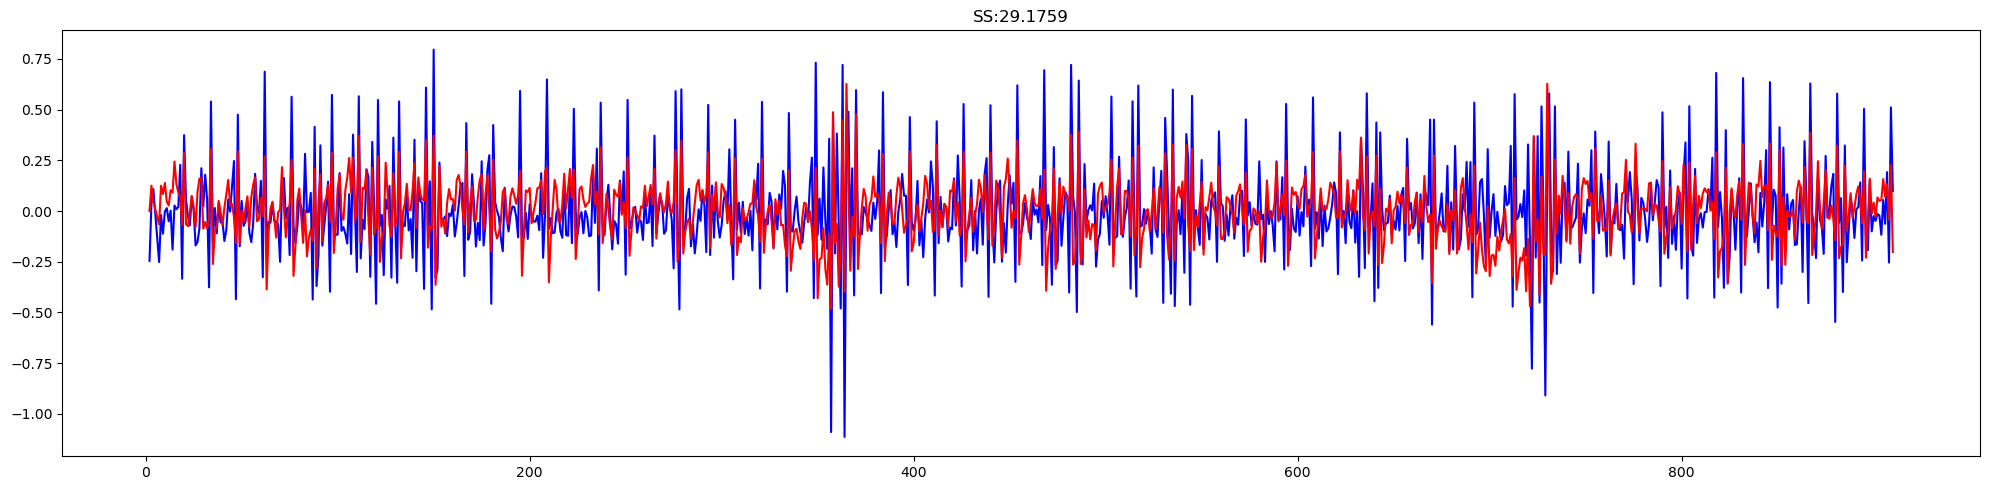

In [ ]:
# Auto regressieve - Moving Average
model = ARIMA(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna(),order=(7,0,5))
results_ARIMA = model.fit()

plt.figure(figsize=(20,5))
plt.plot(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna(),color='blue')
plt.plot(results_ARIMA.fittedvalues,color='red')
#plt.plot(np.power(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna() - results_ARIMA.fittedvalues,2),color='black')
plt.title('SS:%.4f'%sum((results_ARIMA.fittedvalues-data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna())**2))
plt.tight_layout()

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


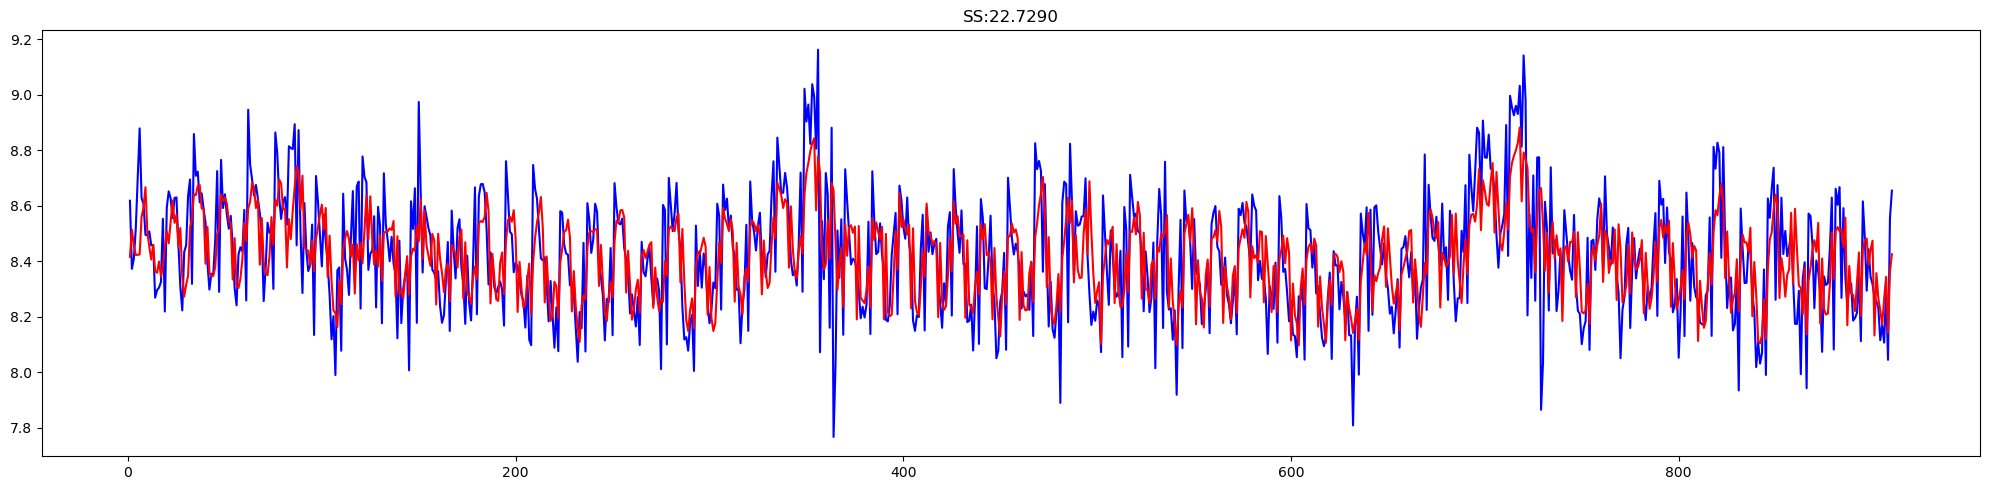

In [ ]:
# Auto regressieve differential Moving Average
model = ARIMA(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna(),order=(7,0,7))
results_ARIMA = model.fit()

plt.figure(figsize=(20,5))
plt.plot(data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna(),color='blue')
plt.plot(results_ARIMA.fittedvalues,color='red')
#plt.plot(np.power(data_timeseries['Sales_station'].loc[data_timeseries['Store']==1].dropna() - results_ARIMA.fittedvalues,2),color='black')
plt.title('SS:%.4f'%sum((results_ARIMA.fittedvalues-data_timeseries['Sales_norm'].loc[data_timeseries['Store']==1].dropna())**2))
plt.tight_layout()

In [ ]:
pred_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True )

In [ ]:
pred_ARIMA_qsum = pred_ARIMA.cumsum()

In [ ]:

prediction = np.exp(pred_ARIMA)
prediction

1      4517.782612
2      4985.376065
3      4714.737002
4      4547.834398
6      4556.521788
          ...     
906    3882.721411
907    4204.404789
908    3438.752558
909    4288.078528
910    4560.580202
Length: 909, dtype: float64

In [ ]:
data_prep.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Sales_norm
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,9.804260e+05
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928,-inf
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000,8.450840e+00
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000,8.722580e+00
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000,8.996280e+00
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000,1.063468e+01


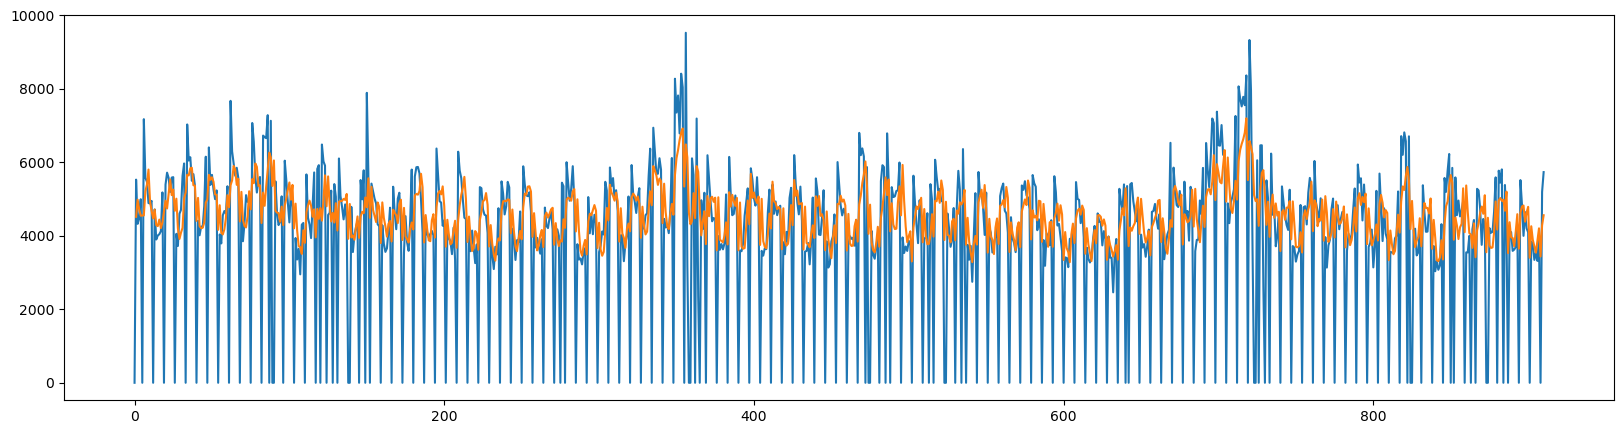

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data_prep['Sales'].loc[data_prep['Store']==1].dropna())
plt.plot(prediction)
plt.show()

### The prediction is pretty much close with actual line, but with time series analysis the outliers like 0 sales was not captured as it focuses on the seasonal line more!